# 강원도를 지켜라!!!
<br>

## 한 눈에 보는 강원도 안전 지도 
<hr>

### 개요

국내 코로나바이러스가 확산된지 반년이 넘었습니다. 실내에서 밀접한 접촉이 일어날 수 있는 활동이나 외출은 최대한 자제하고, 손씻기, 기침예절 등 개인위생수칙을 지키면서 우리의 생활패턴이 바뀌게 되었습니다. 하지만 코로나19 해외 유입과 산발적 지역사회 감염 사례가 지속되면서 코로나19 확진자 수가 다시 급격하게 증가하는 추세를 보여 고강도 사회적 거리두기도 연장되었습니다. 또한, 여름 휴가철을 맞아 타지역 코로나19 확진자들의 방문에 추가 'n차 감염' 우려도 높아지고 있습니다. 그러므로 강원도의 위험지역 및 시설을 파악하여 이를 바탕으로 현재와 미래에 있을 전염병 상황을 대비하여 국민의 안전한 이동을 목표로 강원도 안전지도를 만들고자 하였습니다. 

[관련 기사(2020.07.13)](https://www.kado.net/news/articleView.html?idxno=1031195)

---

# 목차

#### 1.서론
 1.1 목표
 
 1.2 문제인식
 
 1.3 사용데이터
    
    
#### 2.본론
 2.1 강원도 코로나 확진자 데이터에 표시한 휴게소
 
 2.2 코로나로 인한 철도선별 이용 증감그래프
 
 2.3 코로나 확진자 현황과 강원도 모범업소 지도 표시
 
 #### 3.결론
 3.1 활용 방안
 
 3.2 보완점

---

## 1. 서론

## 1.1  목표

* 코로나의 종식과 함께 포스트 코로나 시대 도래에 대비하여 주의해야할 강원도 안전지도 만들기
* 안심 음식점과 휴게소의 안전한 이용을 위한 시각화
* 다중이용시설의 밀집을 분산시키기 위함

## 1.2 문제인식
* 강원도 코로나 확진자 급증
* 다중이용시설의 밀집 (음식점, 휴게소)

In [ ]:
# 필요한 패키지 install
!pip install folium

In [1]:
#필요한 라이브러리를 import
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import folium 
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot

%matplotlib inline 

In [2]:
#강원도 시군구별 인구
total = pd.read_csv('C:/Users/LJY/Desktop/data/2020_totalpeople.csv', encoding='euc-kr')

#그래프에 필요없는 "년도"부분을 필터를 사용하여 제거
kangwon = total.filter(['시군명', '세대수 (세대)', '인구 (명)',
                 '인구 남 (명)', '인구 여 (명)'])
kangwon

,시군명,세대수 (세대),인구 (명),인구 남 (명),인구 여 (명)
0,춘천시,123006,281291,138700,142591
1,원주시,154583,349215,173425,175790
2,강릉시,99086,213442,105893,107549
3,동해시,41141,90522,45845,44677
4,태백시,21798,43866,22168,21698
5,속초시,38689,81786,40420,41366
6,삼척시,34082,67228,34038,33190
7,홍천군,33142,69150,35359,33791
8,횡성군,22832,46575,23785,22790
9,영월군,21044,39127,20143,18984


In [3]:
#그래프에 표시될 항목에 index값을 부여
kangwon.index=['춘천시', '원주시', '강릉시', '동해시', '태백시',
          '속초시', '삼척시', '홍천군', '횡성군', '영월군',
          '평창군', '정선군', '철원군', '화천군', '양구군', '인제군',
          '고성군', '양양군']
kangwon

,시군명,세대수 (세대),인구 (명),인구 남 (명),인구 여 (명)
춘천시,춘천시,123006,281291,138700,142591
원주시,원주시,154583,349215,173425,175790
강릉시,강릉시,99086,213442,105893,107549
동해시,동해시,41141,90522,45845,44677
태백시,태백시,21798,43866,22168,21698
속초시,속초시,38689,81786,40420,41366
삼척시,삼척시,34082,67228,34038,33190
홍천군,홍천군,33142,69150,35359,33791
횡성군,횡성군,22832,46575,23785,22790
영월군,영월군,21044,39127,20143,18984


In [4]:
#그래프의 폰트값을 'Malgun Gothic'으로 설정
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

#그래프의 사이즈 설정
plt.rcParams['figure.figsize'] = [10, 6]

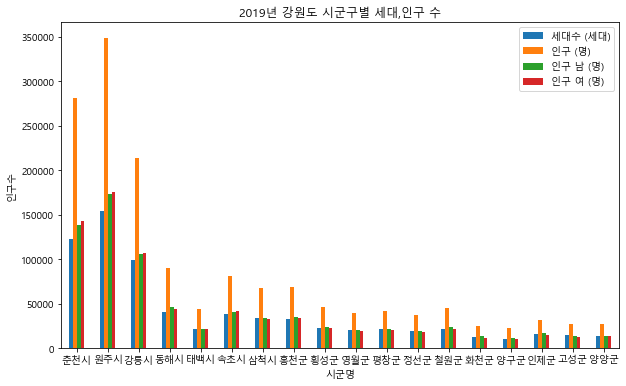

In [5]:
#2019년 강원도 시군구별 세대,인구 수 그래프
kangwon.plot(kind='bar', rot=0)
plt.title("2019년 강원도 시군구별 세대,인구 수")
plt.xlabel("시군명")
plt.ylabel("인구수")
plt.show()

In [6]:
#강원도 코로나 누적 확진 추이 데이터 
count= pd.read_csv("C:/Users/LJY/Desktop/data/Corona.csv", encoding='cp949')
count.shape

(18, 2)

In [7]:
#강원도 코로나 확진자 수
count

,city,count
0,강릉시,12
1,고성,1
2,동해시,0
3,삼척시,1
4,속초,6
5,양구,0
6,양양,3
7,영월,5
8,원주시,108
9,인제,1


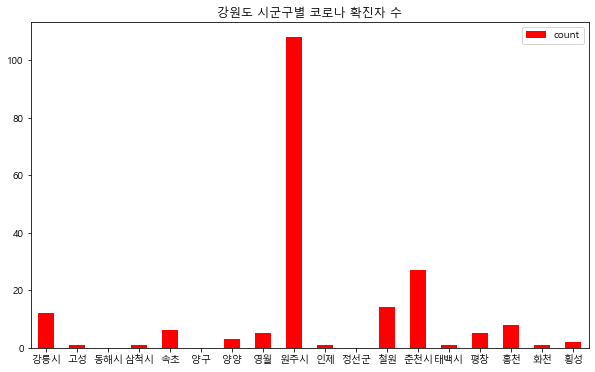

In [8]:
#강원도 시군구별 코로나 확진자 수 그래프
count.index=['강릉시', '고성', '동해시', '삼척시', '속초', '양구',
            '양양', '영월', '원주시', '인제', '정선군', '철원',
            '춘천시', '태백시', '평창', '홍천', '화천', '횡성']
count.plot(kind='bar', title="강원도 시군구별 코로나 확진자 수", rot=0, color='red')
plt.show()

## 1.3 사용 데이터
[DACON 제공 데이터]
* [한국철도공사]여객 일별,역별 승하차 실적
* COVID-19_Region 데이터


<br>[외부 데이터]
* [공공데이터 포털] 강원도_시군별 세대인구 통계
: https://www.data.go.kr/data/15050502/fileData.do

* [공공데이터 포털] 강원도_모범음식점 현황
:https://www.data.go.kr/data/15033691/fileData.do

* [농림축산식품 공공데이터 포털] 농림축산식품부_안심식당 정보
:https://www.data.go.kr/data/15061948/openapi.do

* [공공데이터 포털] 한국도로공사_휴게소정보
:https://www.data.go.kr/dataset/15001274/openapi.do

* [강원도청] 강원도내 코로나 확진자 수 현황(09.03ver)
:https://www.provin.gangwon.kr/covid-19.html


## 2. 본론

#### 강원도 지도를 시각화 한 후 코로나 확진자 데이터를 표시하였습니다. 

## 2.1 강원도 코로나 확진자 데이터에 표시한 휴게소

In [9]:
# 지역에 따른 확진자 수 누적 상황
person = pd.read_csv("C:/Users/LJY/Desktop/data/Region.csv", encoding='cp949')
person

,지역코드,도시,도시 위도,도시 경도,확진자 수 누적
0,30010,강릉시,37.752361,128.876221,12
1,30020,고성,38.380621,128.467999,1
2,30030,동해시,37.524666,129.114517,0
3,30040,삼척시,37.449531,129.165477,1
4,30050,속초,38.207034,128.592088,6
5,30060,양구,38.109957,127.989745,0
6,30070,양양,38.075413,128.619208,3
7,30080,영월,37.183615,128.461719,5
8,30090,원주시,37.342612,127.921281,108
9,30100,인제,38.069599,128.170152,1


In [10]:
#지도 불러옴
map = folium.Map(location=[37.8304115,128.2260705], tiles='openstreetmap', zoom_start=7.5)


# 깅원도 시군구별 누적확진자수 추이에 따른 분류 : 0~10명 파란색 / 11~50 노란색 / 50명~ 빨간색
def color_circle(val):
    if val <= 10:
        return 'blue'
    elif val >= 11 and 50 >= val:
        return 'yellow'
    elif val > 50:
        return 'red'


for i in range(0,len(person)):
    Circle(
        location=[person.iloc[i]['도시 위도'], person.iloc[i]['도시 경도']],
        radius=10000,
        color=color_circle(person.iloc[i]['확진자 수 누적']), fill = True).add_to(map)
    
map 

In [11]:
#강원도 지역 휴게소 현황
healing= pd.read_csv("C:/Users/LJY/Desktop/data/traffic.csv", encoding='cp949')  
healing.head(10)

,번호,시도명,시군구명,휴게소명,도로종류,도로노선번호,도로노선명,도로노선방향,위도,경도,...,약국유무,수유실유무,매점유무,음식점유무,기타편의시설,휴게소대표음식명,휴게소전화번호,데이터기준일자,제공기관코드,제공기관명
0,1,강원도,NaN,강릉(강릉),고속국도,50,영동선,NaN,37.757979,128.806229,...,N,Y,Y,Y,NaN,NaN,033-648-8850,2019-05-31,B500004,한국도로공사
1,2,강원도,NaN,강릉(인천),고속국도,50,영동선,NaN,37.759305,128.805682,...,N,Y,Y,Y,NaN,NaN,033-647-9970,2019-05-31,B500004,한국도로공사
2,3,강원도,NaN,구정(삼척),고속국도,65,동해선,NaN,37.722354,128.851747,...,N,Y,Y,Y,NaN,NaN,033-644-8345,2019-05-31,B500004,한국도로공사
3,4,강원도,NaN,구정(속초),고속국도,65,동해선,NaN,37.722684,128.853952,...,N,Y,Y,Y,NaN,NaN,033-644-4760,2019-05-31,B500004,한국도로공사
4,5,강원도,NaN,내린천(통합),고속국도,60,서울양양선,NaN,37.916278,128.286464,...,N,Y,Y,Y,NaN,NaN,033-852-8615,2019-05-31,B500004,한국도로공사
5,6,강원도,NaN,동해(삼척),고속국도,65,동해선,NaN,37.601252,129.074487,...,N,Y,Y,Y,NaN,NaN,033-534-6631,2019-05-31,B500004,한국도로공사
6,7,강원도,NaN,문막(강릉),고속국도,50,영동선,NaN,37.335396,127.857785,...,Y,Y,Y,Y,NaN,NaN,033-731-8481,2019-05-31,B500004,한국도로공사
7,8,강원도,NaN,문막(인천),고속국도,50,영동선,NaN,37.297804,127.817717,...,N,Y,Y,Y,NaN,NaN,033-747-8162,2019-05-31,B500004,한국도로공사
8,9,강원도,NaN,옥계(속초),고속국도,65,동해선,NaN,37.615583,129.059939,...,N,Y,Y,Y,NaN,NaN,033-534-1700,2019-05-31,B500004,한국도로공사
9,10,강원도,NaN,원주(부산),고속국도,55,중앙선,NaN,37.435109,127.929590,...,N,Y,Y,Y,NaN,NaN,033-731-4291,2019-05-31,B500004,한국도로공사


In [12]:
#휴게소 위도값 경도값에 따른 Marker 생성 
for idx, row in healing.iterrows():
    Marker([row['위도'], row['경도']]).add_to(map)
    
folium.Marker(location=[37.75797854, 128.806229],
tooltip="Gangneung").add_to(map)


folium.Marker(location=[37.7593047, 128.805682],
tooltip="Gangneung Daegwallyeong").add_to(map)


folium.Marker(location=[37.72235422, 128.851747],
tooltip="Gujeong Samcheok").add_to(map)


folium.Marker(location=[37.72268368, 128.853952],
tooltip="Gujeong Sokcho").add_to(map)


folium.Marker(location=[37.91627758, 128.286464],
tooltip="Naerincheon ").add_to(map)


folium.Marker(location=[37.60125241, 129.074487],
tooltip="Donghae Samcheok").add_to(map)


folium.Marker(location=[37.33539598, 127.8577852],
tooltip="Munmak Gangneung").add_to(map)


folium.Marker(location=[37.29780383, 127.8177166],
tooltip="Munmak Incheon").add_to(map)


folium.Marker(location=[37.61558344, 129.0599387],
tooltip="Okgye Sokcho").add_to(map)


folium.Marker(location=[37.43510935, 127.9295895],
tooltip="Wonju Busan").add_to(map)


folium.Marker(location=[37.43465339, 127.9312851],
tooltip="Wonju Chuncheon").add_to(map)


folium.Marker(location=[36.19979712, 128.0027541],
tooltip="Chuncheon Busan").add_to(map)


folium.Marker(location=[37.02230756, 127.8378779],
tooltip="Chiak Busan").add_to(map)


folium.Marker(location=[37.25390732, 128.0491398],
tooltip="Chiak Chuncheon").add_to(map)


folium.Marker(location=[37.60582137, 128.4530311],
tooltip="Pyeongchang Gangneung").add_to(map)


folium.Marker(location=[37.61030302, 128.4636228],
tooltip="Pyeongchang Incheon").add_to(map)


folium.Marker(location=[37.75862978, 128.0064206],
tooltip="Hongcheon Seoul").add_to(map)


folium.Marker(location=[37.75754634, 128.0034765],
tooltip="Hongcheon Yangyang").add_to(map)


folium.Marker(location=[37.71257828, 127.8277631],
tooltip="Hongcheon River").add_to(map)


folium.Marker(location=[37.46333026, 128.1344503],
tooltip="HoengSheng Gangneung").add_to(map)


folium.Marker(location=[37.46464534, 128.1350773],
tooltip="Hoeng Sheng Incheon").add_to(map)
    
    
#강원도 코로나 지도와 강원도 방면 휴게소 현황을 합친 지도
map

## 2.2 코로나로 인한 철도선별 이용 증감그래프

국내 코로나 확진자가 추이에 따라 철도 이용률이 증감하였다.
<br>
[관련기사(2020.04.17)](https://www.yna.co.kr/view/GYH20200417000400044)

In [13]:
#1월~5월 철도선별 승하차인원 현황을 불러옴
train = pd.read_csv("C:/Users/LJY/Desktop/data/ktx_all.csv", encoding='euc-kr')
train.index=['1', '2', '3', '4', '5']  
train

,년월,경춘선춘천역 승차인원,경춘선춘천역 하차인원,KTX강릉역 승차인원,KTX강릉역 하차인원,"중앙선,강릉KTX 만종역 승차인원","중앙선,강릉KTX 만종역 하차인원",경춘선남춘천역 승차인원,경춘선남춘천역 하차인원,중앙선원주역 승차인원,중앙선원주역 하차인원
1,202001,2040,1998,5060,4840,1248,1168,2652,2494,1657,1615
2,202002,1288,1303,2777,2748,846,808,1813,1735,1073,1065
3,202003,821,819,1333,1303,571,549,1272,1211,676,666
4,202004,1029,1043,1826,1897,782,767,1588,1521,998,1021
5,202005,1439,1410,2741,2578,980,942,1992,1850,1296,1293


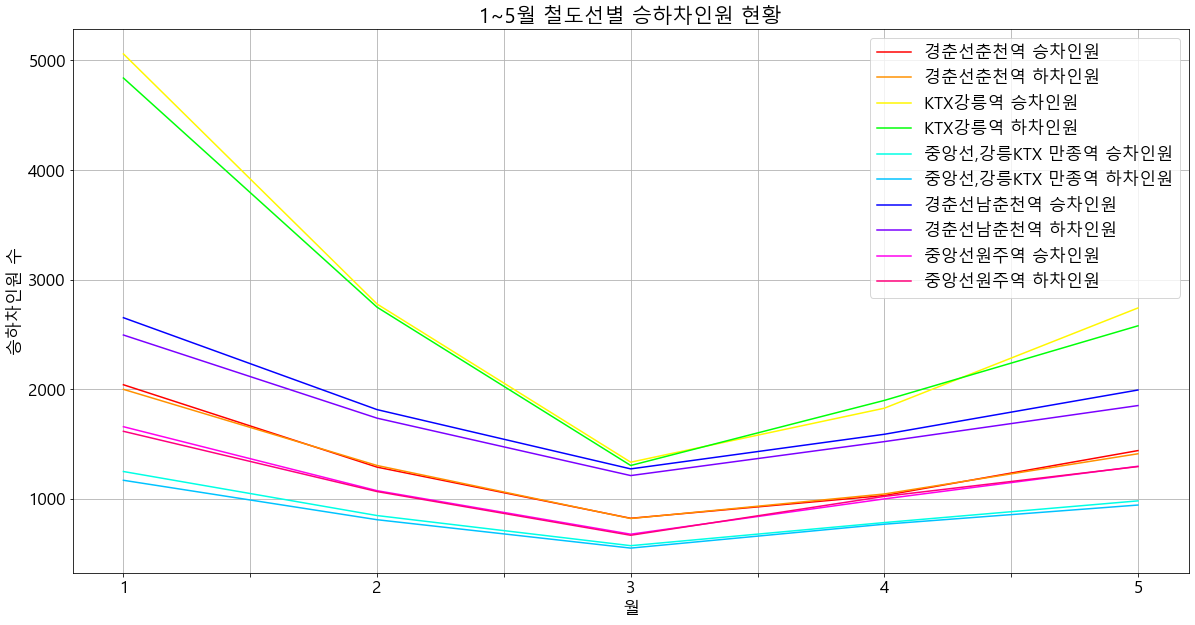

In [14]:
# 선로별 승하차 인원 수
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 17
pyplot.rcParams["figure.figsize"] = (20, 10)
train['경춘선춘천역 승차인원'].plot(color='#ff0000')
train['경춘선춘천역 하차인원'].plot(color='#ff9100')
train['KTX강릉역 승차인원'].plot(color='#fff700')
train['KTX강릉역 하차인원'].plot(color='#00ff08')
train['중앙선,강릉KTX 만종역 승차인원'].plot(color='#00ffe5')
train['중앙선,강릉KTX 만종역 하차인원'].plot(color='#00c3ff')
train['경춘선남춘천역 승차인원'].plot(color='#0400ff')
train['경춘선남춘천역 하차인원'].plot(color='#7b00ff')
train['중앙선원주역 승차인원'].plot(color='#ff00ee')
train['중앙선원주역 하차인원'].plot(color='#ff007b')
pyplot.grid()
pyplot.legend()
pyplot.title("1~5월 철도선별 승하차인원 현황")
pyplot.xlabel("월")
pyplot.ylabel("승하차인원 수")
pyplot.show()

## 2.3 코로나 확진자 현황과 강원도 모범업소 지도 표시

In [15]:
#강원도 모범 음식점 현황
food = pd.read_csv("C:/Users/LJY/Desktop/data/강원도_모범음식점 현황_20200811.csv", encoding = 'cp949')
food

,시군구명,업소명,식당업종,업태,주요메뉴,대표자명,연락처,소재지도로명주소,경도,위도,홈페이지주소,최대수용인원,운영시간,주차장보유여부
0,강릉시,해계머니,일반음식점,한식,"해계탕, 해물탕, 물회",고정연,033-643-0990,강원도 강릉시 옥천로 77 (교동),128.897685,37.760361,NaN,70.0,10:00~23:00,Y
1,강릉시,마재,일반음식점,한식,비빔밥,전재영,033-644-1225,강원도 강릉시 저동골길105번길 12-23 (저동),128.888971,37.803207,NaN,100.0,11:30~21:00,Y
2,강릉시,위촌리전통한우,일반음식점,식육,소고기구이,신유만,033-644-6658,강원도 강릉시 성산면 소목길 203-10,128.847158,37.753383,NaN,180.0,09:30~21:30,Y
3,강릉시,유광회관1호점,일반음식점,식육,"고기구이, 갈비탕",채나영,033-644-9292,강원도 강릉시 남부로212번길 13 (노암동),128.903976,37.742968,NaN,150.0,11:00~22:00,Y
4,강릉시,주문진횟집,일반음식점,일식,생선회,안승우,033-662-5955,강원도 강릉시 연곡면 영진길 63,128.842949,37.870355,NaN,180.0,12:00~23:30,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,화천군,서화산가든,일반음식점,한식,"능이오리백숙, 갈비",나성숙,033-442-2989,강원도 화천군 화천읍 상승로 49-19,127.703607,38.105647,NaN,60.0,09:00~22:00,Y
1054,화천군,웰빙닭갈비,일반음식점,한식,"닭갈비,막국수",김종수,033-441-4102,강원도 화천군 사내면 사내로7길 18,127.521368,38.071875,NaN,60.0,10:00~22:00,Y
1055,화천군,중국성,일반음식점,중식,"탕수육,자장면",김봉석,033-441-1771,강원도 화천군 화천읍 중앙로5길 2,127.706237,38.104446,NaN,60.0,10:00~20:30,N
1056,화천군,산마을가든,일반음식점,한식,"등심,삼겹살",지민정,033-441-7933,강원도 화천군 사내면 사내로 57,127.520336,38.072972,NaN,50.0,11:00~22:00,Y


In [16]:
#코로나 확진자 현황과 강원도 모범업소 지도 표시
newmap = folium.Map(location=[37.8304115,128.2260705], tiles='Stamen Toner', zoom_start=9) 

for idx, row in food.iterrows():
    Circle([row['위도'], row['경도']], radius=50, fill= True).add_to(newmap)

    
def color_circle(val):
    if val <= 10:
        return 'blue'
    elif val >= 11 and 50 >= val:
        return 'yellow'
    elif val > 50:
        return 'red'


for i in range(0,len(person)):
    Circle(
        location=[person.iloc[i]['도시 위도'], person.iloc[i]['도시 경도']],
        radius=10000,
        color=color_circle(person.iloc[i]['확진자 수 누적']), fill = True).add_to(newmap)


newmap 

In [17]:
#강원도 모범음식점 데이터와 강원도 안심음식점에서 추출한 공통데이터 현황
safefood = pd.read_csv("C:/Users/LJY/Desktop/data/safefood.csv", encoding = 'cp949') 


testmap = folium.Map(location=[37.8304115,128.2260705], tiles='Stamen Toner', zoom_start=9)
for idx, row in safefood.iterrows():
    folium.Marker([row['위도'], row['경도']],icon=folium.Icon(color='green', icon='star')).add_to(testmap)

def color_circle(val):
    if val <= 10:
        return 'blue'
    elif val >= 11 and 50 >= val:
        return 'yellow'
    elif val > 50:
        return 'red'


for i in range(0,len(person)):
    Circle(
        location=[person.iloc[i]['도시 위도'], person.iloc[i]['도시 경도']],
        radius=10000,
        color=color_circle(person.iloc[i]['확진자 수 누적']), fill = True).add_to(testmap)    
    
   
    
testmap
# Marker : 강원도 안심업소와 강원도 모범업소 두 가지 요건을 모두 충족하는 업소

<br>

# 3. 결론

## 3.1 활용 방안
* SKT T-map 안심식당과 같은 사례를 모티브로 포스트코로나 시대의 안심휴게소나 안심상권같은 다중이용시설을 발전시키기 위한 발판이 되고자합니다. 또한, 대규모 집단감염에 대비한 국민의 안전한 이동에 도움이 될 것입니다.
<br>[관련기사](https://www.fnnews.com/news/202008040955111735)

## 3.2 보완점
* 서울시에만 집중된 데이터로 인해 강원도 데이터 자료부족

---

본 저작물의 저작권은 Apache License v2.0을 따릅니다